In [1]:
# -*- coding: utf-8 -*-

'''
@Author   :   Corley Tang
@contact  :   cutercorleytd@gmail.com
@Github   :   https://github.com/corleytd
@Time     :   2023-01-13 20:55
@Project  :   Hands-on Deep Learning with PyTorch-optimization_and_least_square
基本优化思想与最小二乘法
'''

# 导入所需的库
import random
import warnings

import numpy as np
import torch
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)

优化思想指的是利用数学工具求解复杂问题的基本思想，同时也是近现代机器学习算法在实际建模过程中经常使用基础理论在实际建模过程中，往往会先给出待解决问题的数值评估指标，并在此基础之上构建方程、采用数学工具、不断优化评估指标结果，以期达到可以达到的最优结果。
## 1.线性回归问题
线性回归问题除了可以用矩阵方法求解，还可以转化为最优化问题：
1. 确定优化数值指标
2. 确定优化目标函数

In [2]:
# 可视化目标函数
x = np.arange(0, 6, 0.05)
y = np.arange(-3, 3, 0.05)
a, b = np.meshgrid(x, y)
SSE = (3 - a - b) ** 2 + (6 - 2 * a - b) ** 2  # 目标函数
a, b, SSE

(array([[0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        ...,
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95],
        [0.  , 0.05, 0.1 , ..., 5.85, 5.9 , 5.95]]),
 array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
        [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
        [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
        ...,
        [ 2.85,  2.85,  2.85, ...,  2.85,  2.85,  2.85],
        [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
        [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95]]),
 array([[117.    , 114.6125, 112.25  , ...,   7.3125,   7.85  ,   8.4125],
        [115.505 , 113.1325, 110.785 , ...,   7.5725,   8.125 ,   8.7025],
        [114.02  , 111.6625, 109.33  , ...,   7.8425,   8.41  ,   9.0025],
        ...,
        [  9.945 ,   9.3125,   8.705 , ..., 105.5925, 107.885 , 110.2025],
        [

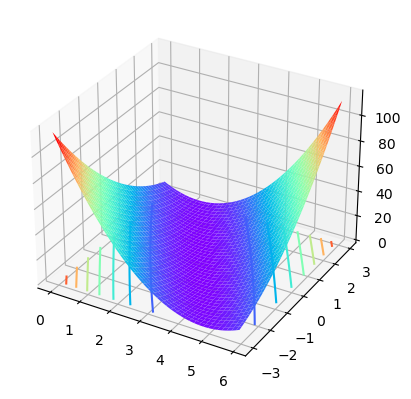

In [3]:
ax = plt.axes(projection='3d')
ax.plot_surface(a, b, SSE, cmap='rainbow')
ax.contour(a, b, SSE, zdir='z', offset=0, cmap='rainbow')  # 生成z方向投影，投到x-y平面
plt.show()

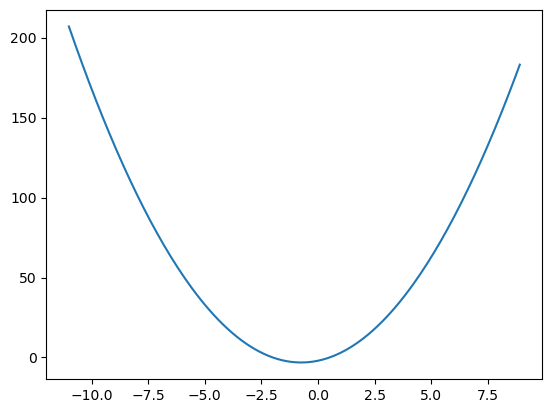

In [4]:
# 函数的凹凸性：简单的线性函数都是凸函数
# 可视化一个凸函数
x = np.arange(-11, 9, 0.1)
y = 2 * x ** 2 + 3 * x - 2
plt.plot(x, y, '-')
plt.show()

In [5]:
# 验证函数的凹凸性
func = lambda x: 2 * x ** 2 + 3 * x - 2
x1, x2 = random.random() * 20 - 11, random.random() * 20 - 11
(func(x1) + func(x2)) / 2, func((x1 + x2) / 2)

(75.98248182349391, 12.995291595401119)

### 凸函数的最小值
凸函数的最小值存在且唯一，凸函数求解最小值的一般方法：
- 对于一元函数，如果存在导数为0的点，则该点就是最小值点
- 对于多元函数，如果存在某一点，使得函数的各个自变量的偏导数都为0，则该点就是最小值点

对于凸函数的最小值求解，最基本的出发点就是寻找导数为0的点（驻点），最小二乘法也是基于偏导函数取值为0联立的方程组进行的求解。
## 2.机器学习建模思路
机器学习（和深度学习）利用优化方法建模的一般思想如下：
1. 提出基本模型
2. 确定损失函数（关于模型参数的函数）和目标函数
3. 根据目标函数特性选择优化方法，求解目标函数
## 3.第一个优化算法：最小二乘法
最小二乘法的2种表示方法：
- 代数表示
- 矩阵表示：$\hat w ^T = (X^TX)^{-1}X^Ty$
    应用条件是特征张量的交叉乘积可逆

In [6]:
# 最小二乘法的矩阵实现
X = torch.tensor([[1., 1], [2, 1]])
y = torch.tensor([[3.], [6]])
X, y

(tensor([[1., 1.],
         [2., 1.]]),
 tensor([[3.],
         [6.]]))

In [7]:
# 手动实现
torch.mm(torch.mm(torch.inverse(torch.mm(X.t(), X)), X.t()), y), (X.t() @ X).inverse() @ X.t() @ y

(tensor([[ 3.0000e+00],
         [-9.5367e-07]]),
 tensor([[ 3.0000e+00],
         [-9.5367e-07]]))

In [8]:
# 调用API
torch.lstsq(y, X)  # 待求解系数、QR分解矩阵

torch.return_types.lstsq(
solution=tensor([[3.0000e+00],
        [8.2194e-07]]),
QR=tensor([[-2.2361, -1.3416],
        [ 0.6180, -0.4472]]))

In [9]:
# 矩阵范数
t1 = torch.randint(1, 20, size=(4,)).float()
t2 = torch.randint(1, 20, size=(3, 4), dtype=torch.float)
# 第二范数
torch.linalg.norm(t1), t1.square().sum().sqrt()  # 默认第二范数

(tensor(11.6189), tensor(11.6189))

In [10]:
# 第一范数
torch.linalg.norm(t2, 1), t2.abs().sum(0).max()

(tensor(43.), tensor(43.))

## 4.autograd求导
反向验证损失函数SSE在点(3, 0)处的各个分量的偏导数是否都为0。此时就需要借助PyTorch中的**autograd模块**来进行偏导计算，严格意义上来讲，autograd模块是PyTorch中的自动微分模块，我们可以通过autograd模块中的函数进行微分运算，在神经网络模型中，**通过自动微分运算求解梯度是模型优化的核心**。

新版本的PyTorch中，可微分性变成了Tensor的一个基本属性，我们只需要在创建Tensor时，通过设置requires_grad属性为True、规定张量可微分即可。

In [11]:
# 定义参数
a = torch.tensor(3., requires_grad=True)
b = torch.tensor(0., requires_grad=True)
a, a.requires_grad, b, b.requires_grad

(tensor(3., requires_grad=True), True, tensor(0., requires_grad=True), True)

In [12]:
# 定义损失函数
sse = torch.square(3 - a - b) + torch.pow(6 - 2 * a - b, 2)
sse

tensor(0., grad_fn=<AddBackward0>)

In [13]:
# 调用API进行偏导运算
torch.autograd.grad(sse, (a, b))  # 偏导都为0，则(3, 0)就是损失函数的驻点（最小值点）

(tensor(-0.), tensor(-0.))

In [14]:
# torch.autograd.grad是通用微分函数，当只输入一个自变量时计算结果就是导数，输入多个自变量时则会计算偏导数
x = torch.tensor(-1., requires_grad=True)
y = 2 * x ** 2 + 3 * x - 2
torch.autograd.grad(y, x)

(tensor(-1.),)